In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import numpy as np
import statistics

In [4]:
data=pd.read_csv("Dataset/fastfood.csv")

**The goal of collecting this dataset**

Fast food is known for its convenience and affordability, but it is also infamous for its high-calorie, high-fat, 
and high-sugar content. This dataset aims to shed light on the nutritional value of these fast food products, helping consumers make more informed decisions about their food choices.

With information on calories, fat, carbohydrates, protein, and other key nutrients, this dataset provides a valuable resource for nutritionists, researchers, and health-conscious individuals. By analyzing this dataset, we can gain a better understanding of the nutritional impact of fast food consumption and work towards creating healthier food options in the fast food industry.

**Data**

The dataset we choose is(Fast Food Nutrition) which provides a comprehensive breakdown of the nutritional content of various fast food products from popular fast food chains. We got our dataset from Kaggle website, URL of source data: https://www.kaggle.com/datasets/ulrikthygepedersen/fastfood-nutrition

In [86]:
#Number of observations 
len(data)

515

Our dataset consists of 515 records.

In [87]:
#Number of variables 
data.shape[1]

17

Our dataset consists of 17 variables.

In [88]:
#Data type of each variable 
data.dtypes

restaurant      object
item            object
calories         int64
cal_fat          int64
total_fat        int64
sat_fat        float64
trans_fat      float64
cholesterol      int64
sodium           int64
total_carb       int64
fiber          float64
sugar            int64
protein        float64
vit_a          float64
vit_c          float64
calcium        float64
salad           object
dtype: object

In [89]:
#The 10 first records in the dataset
data.head(10)

,restaurant,item,calories,cal_fat,total_fat,sat_fat,trans_fat,cholesterol,sodium,total_carb,fiber,sugar,protein,vit_a,vit_c,calcium,salad
0,Mcdonalds,Artisan Grilled Chicken Sandwich,380,60,7,2.0,0.0,95,1110,44,3.0,11,37.0,4.0,20.0,20.0,Other
1,Mcdonalds,Single Bacon Smokehouse Burger,840,410,45,17.0,1.5,130,1580,62,2.0,18,46.0,6.0,20.0,20.0,Other
2,Mcdonalds,Double Bacon Smokehouse Burger,1130,600,67,27.0,3.0,220,1920,63,3.0,18,70.0,10.0,20.0,50.0,Other
3,Mcdonalds,Grilled Bacon Smokehouse Chicken Sandwich,750,280,31,10.0,0.5,155,1940,62,2.0,18,55.0,6.0,25.0,20.0,Other
4,Mcdonalds,Crispy Bacon Smokehouse Chicken Sandwich,920,410,45,12.0,0.5,120,1980,81,4.0,18,46.0,6.0,20.0,20.0,Other
5,Mcdonalds,Big Mac,540,250,28,10.0,1.0,80,950,46,3.0,9,25.0,10.0,2.0,15.0,Other
6,Mcdonalds,Cheeseburger,300,100,12,5.0,0.5,40,680,33,2.0,7,15.0,10.0,2.0,10.0,Other
7,Mcdonalds,Classic Chicken Sandwich,510,210,24,4.0,0.0,65,1040,49,3.0,6,25.0,0.0,4.0,2.0,Other
8,Mcdonalds,Double Cheeseburger,430,190,21,11.0,1.0,85,1040,35,2.0,7,25.0,20.0,4.0,15.0,Other
9,Mcdonalds,Double Quarter Pounder® with Cheese,770,400,45,21.0,2.5,175,1290,42,3.0,10,51.0,20.0,6.0,20.0,Other


**Some information about the dataset:**

In [90]:
#The mean of the datase:
data.describe()

,calories,cal_fat,total_fat,sat_fat,trans_fat,cholesterol,sodium,total_carb,fiber,sugar,protein,vit_a,vit_c,calcium
count,515.000000,515.000000,515.000000,515.000000,515.000000,515.000000,515.000000,515.000000,503.000000,515.000000,514.000000,301.000000,305.000000,305.000000
mean,530.912621,238.813592,26.590291,8.153398,0.465049,72.456311,1246.737864,45.664078,4.137177,7.262136,27.891051,18.857143,20.170492,24.852459
std,282.436147,166.407510,18.411876,6.418811,0.839644,63.160406,689.954278,24.883342,3.037460,6.761301,17.683921,31.384330,30.592243,25.522073
min,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,15.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,330.000000,120.000000,14.000000,4.000000,0.000000,35.000000,800.000000,28.500000,2.000000,3.000000,16.000000,4.000000,4.000000,8.000000
50%,490.000000,210.000000,23.000000,7.000000,0.000000,60.000000,1110.000000,44.000000,3.000000,6.000000,24.500000,10.000000,10.000000,20.000000
75%,690.000000,310.000000,35.000000,11.000000,1.000000,95.000000,1550.000000,57.000000,5.000000,9.000000,36.000000,20.000000,30.000000,30.000000
max,2430.000000,1270.000000,141.000000,47.000000,8.000000,805.000000,6080.000000,156.000000,17.000000,87.000000,186.000000,180.000000,400.000000,290.000000


In [91]:
#find out if there is any missing values
data.isnull().sum()

restaurant       0
item             0
calories         0
cal_fat          0
total_fat        0
sat_fat          0
trans_fat        0
cholesterol      0
sodium           0
total_carb       0
fiber           12
sugar            0
protein          1
vit_a          214
vit_c          210
calcium        210
salad            0
dtype: int64

In [92]:
#calculate the variance
data.var(numeric_only=True)

calories        79770.177175
cal_fat         27691.459348
total_fat         338.997182
sat_fat            41.201131
trans_fat           0.705002
cholesterol      3989.236901
sodium         476036.905859
total_carb        619.180711
fiber               9.226165
sugar              45.715198
protein           312.721050
vit_a             984.976190
vit_c             935.885311
calcium           651.376186
dtype: float64

array([[<AxesSubplot:title={'center':'calories'}>]], dtype=object)

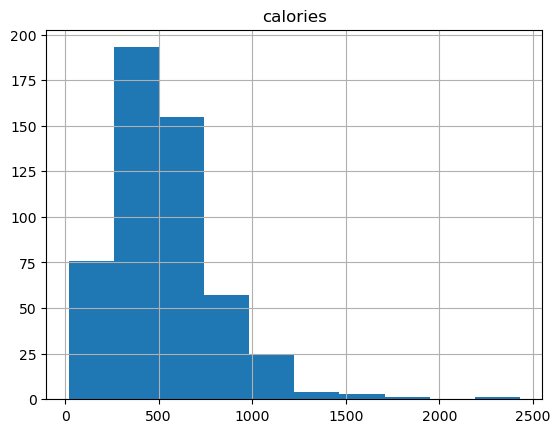

In [93]:
# data visualization of calories
data.hist(column='calories')

The Y-axis is the total number of observations and the X-axis shows the value of the Calories of each item

array([[<AxesSubplot:title={'center':'cal_fat'}>]], dtype=object)

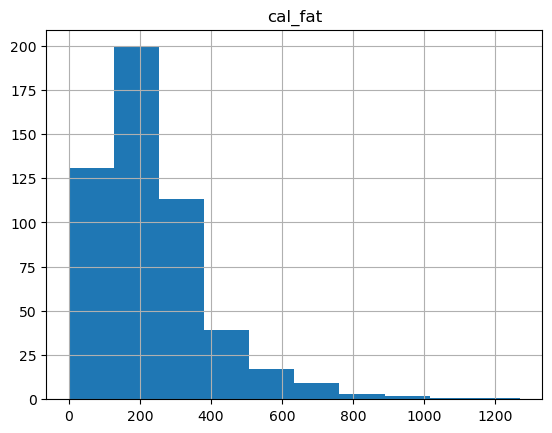

In [94]:
# data visualization of cal_fat
data.hist(column='cal_fat')

The Y-axis is the total number of observations and the X-axis shows the value of the Cal_fat of each item

array([[<AxesSubplot:title={'center':'total_fat'}>]], dtype=object)

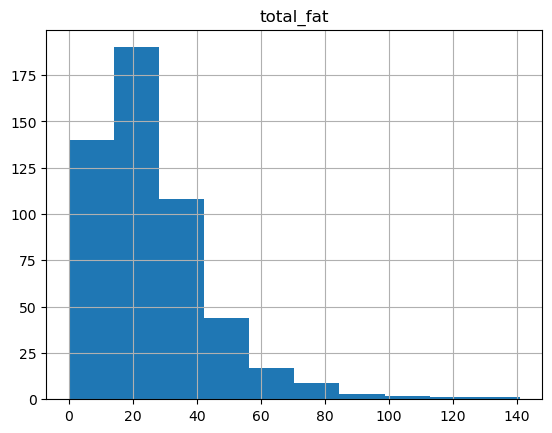

In [95]:
# data visualization of total_fat
data.hist(column='total_fat')

The Y-axis is the total number of observations and the X-axis shows the value of the total_fat of each item

array([[<AxesSubplot:title={'center':'sat_fat'}>]], dtype=object)

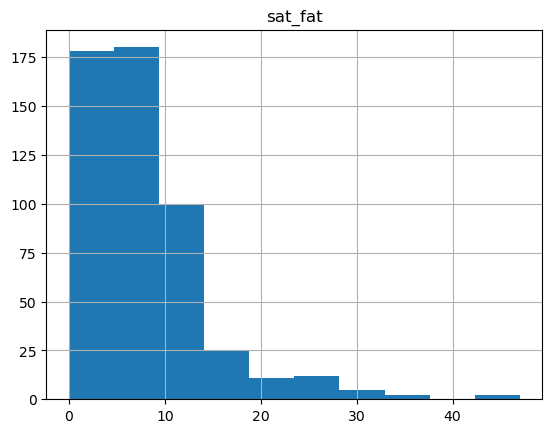

In [96]:
# data visualization of sat_fat
data.hist(column='sat_fat')

The Y-axis is the total number of observations and the X-axis shows the value of the sat_fat of each item

array([[<AxesSubplot:title={'center':'trans_fat'}>]], dtype=object)

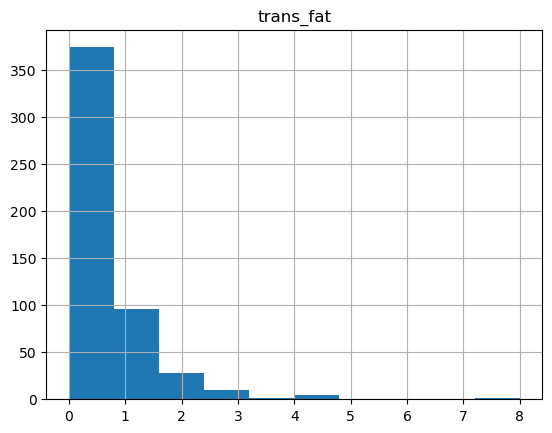

In [97]:
# data visualization of trans_fat
data.hist(column='trans_fat')

The Y-axis is the total number of observations and the X-axis shows the value of the trans_fat of each item

array([[<AxesSubplot:title={'center':'cholesterol'}>]], dtype=object)

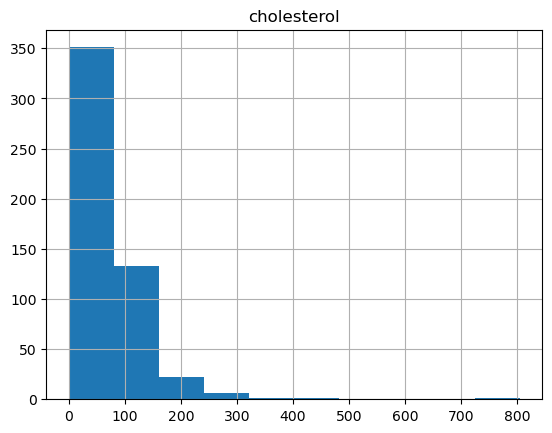

In [98]:
# data visualization of cholesterol
data.hist(column='cholesterol')

The Y-axis is the total number of observations and the X-axis shows the value of the Cholesterol of each item

array([[<AxesSubplot:title={'center':'sodium'}>]], dtype=object)

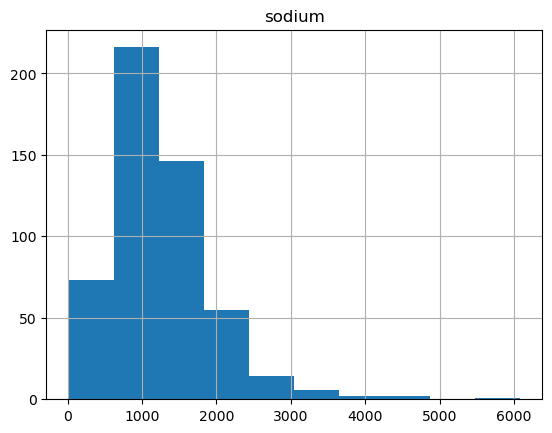

In [99]:
# data visualization of sodium
data.hist(column='sodium')

The Y-axis is the total number of observations and the X-axis shows the value of the Sodium of each item

array([[<AxesSubplot:title={'center':'total_carb'}>]], dtype=object)

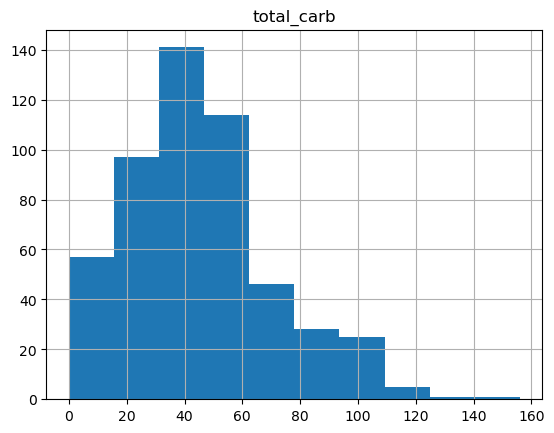

In [100]:
# data visualization of total_carb
data.hist(column='total_carb')

The Y-axis is the total number of observations and the X-axis shows the value of the total_carb of each item

array([[<AxesSubplot:title={'center':'fiber'}>]], dtype=object)

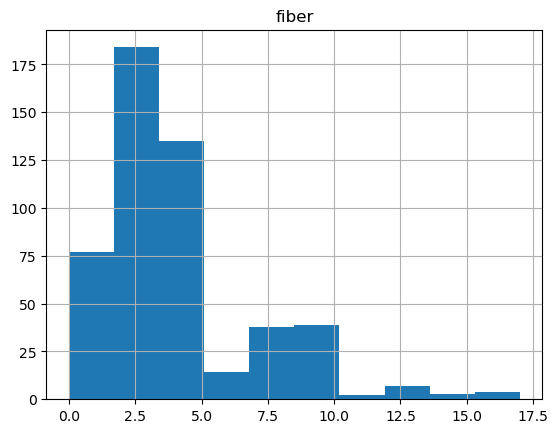

In [101]:
# data visualization of fiber
data.hist(column='fiber')

The Y-axis is the total number of observations and the X-axis shows the value of the Fiber of each item

array([[<AxesSubplot:title={'center':'sugar'}>]], dtype=object)

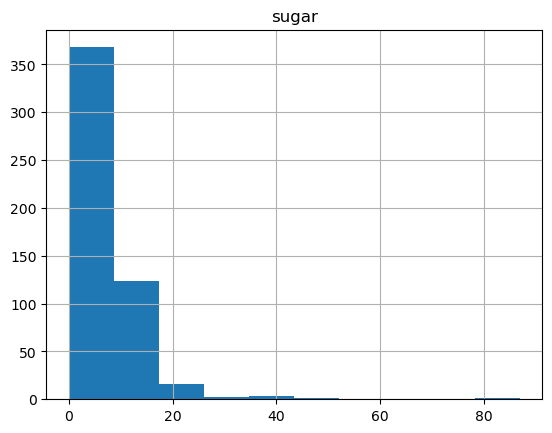

In [102]:
# data visualization of sugar
data.hist(column='sugar')

The Y-axis is the total number of observations and the X-axis shows the value of the Sugar of each item

array([[<AxesSubplot:title={'center':'protein'}>]], dtype=object)

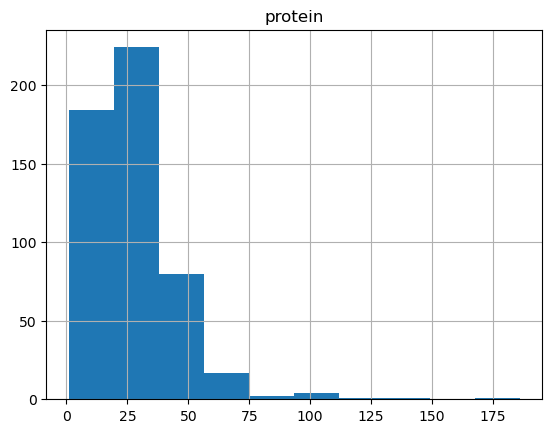

In [103]:
# data visualization of protein
data.hist(column='protein')

The Y-axis is the total number of observations and the X-axis shows the value of the Protein of each item

array([[<AxesSubplot:title={'center':'vit_a'}>]], dtype=object)

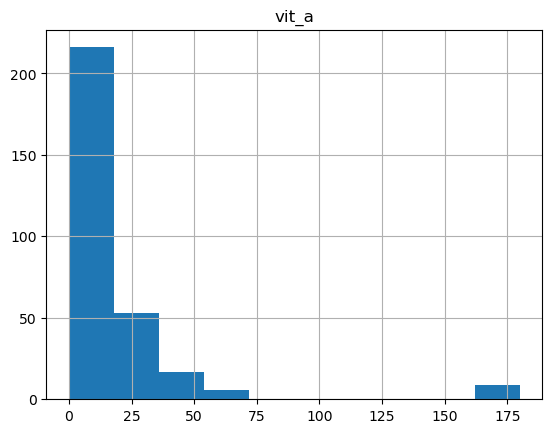

In [104]:
# data visualization of vit_a
data.hist(column='vit_a')

The Y-axis is the total number of observations and the X-axis shows the value of the vit_a of each item

array([[<AxesSubplot:title={'center':'vit_c'}>]], dtype=object)

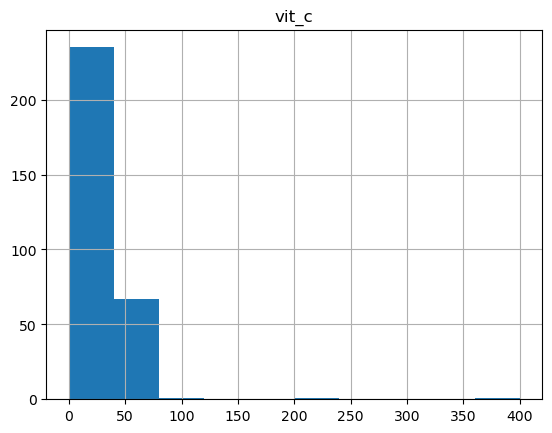

In [105]:
# data visualization of vit_c
data.hist(column='vit_c')

The Y-axis is the total number of observations and the X-axis shows the value of the vit_c of each item and it shows that most items contain vit_c in a range between 0-50

array([[<AxesSubplot:title={'center':'calcium'}>]], dtype=object)

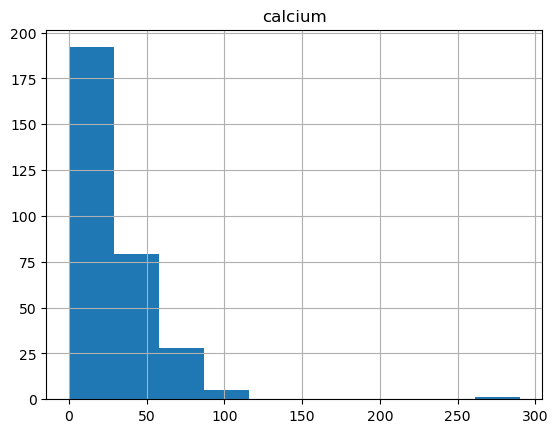

In [106]:
# data visualization of calcium
data.hist(column='calcium')

The Y-axis is the total number of observations and the X-axis shows the value of the Calcium of each item

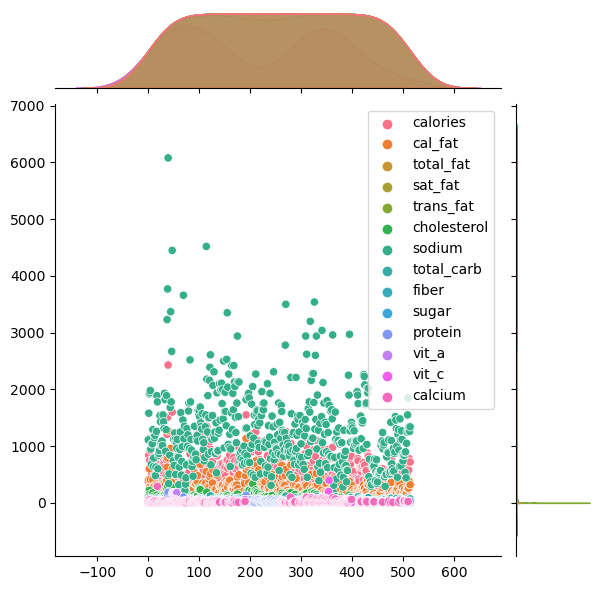

In [107]:
#joint plot diagram shows each nutrition column
sns.jointplot(data= data, dropna =True)
plt.show()

The plot diagram shows the relationship between the variables and how they are distirbuted 

<AxesSubplot:>

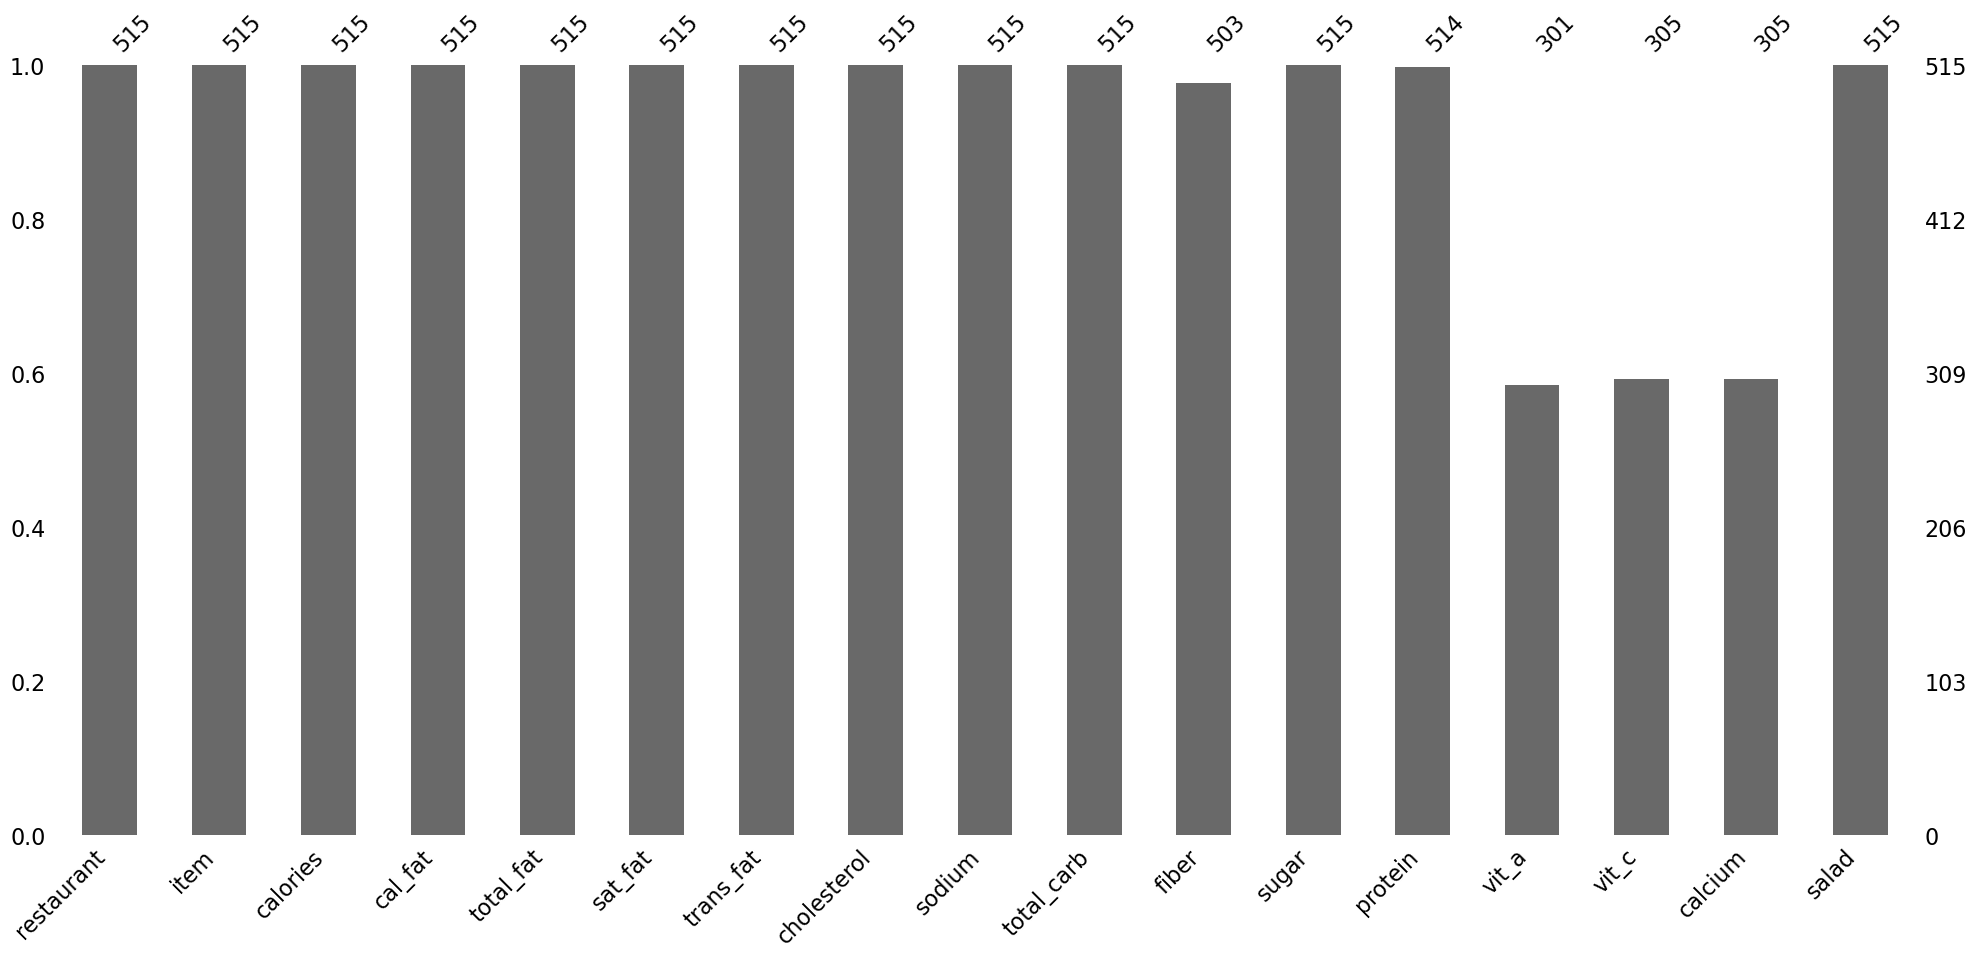

In [108]:
# missing values visualizing using bar chart
msno.bar(data)

This bar chart shows that some column have missing values such as vit_a, vit_c, and calcium

In [109]:
# calculating mean 
meancal = data['calories'].mean()
meancal_fat = data['cal_fat'].mean()
meantotal_fat = data['total_fat'].mean()
meansat_fat = data['sat_fat'].mean()
meantrans_fat = data['trans_fat'].mean()
meancholesterol = data['cholesterol'].mean()
meansodium = data['sodium'].mean()
meantotal_carb = data['total_carb'].mean()
meanfiber = data['fiber'].mean()
meansugar = data['sugar'].mean()
meanprotein = data['protein'].mean()
meanvit_a = data['vit_a'].mean()
meanvit_c = data['vit_c'].mean()
meancalcium = data['calcium'].mean()

print("Calories mean: " , meancal)
print("Cal_Fat mean: " , meancal_fat)
print("Total Fat mean: " , meantotal_fat)
print("Sat_fat mean: " , meansat_fat)
print("Trans_fat mean: " , meantrans_fat)
print("Cholesterol mean: " , meancholesterol)
print("Sodium mean: " , meansodium)
print("Total Carb mean: " , meantotal_carb)
print("Fiber mean: " , meanfiber)
print("Sugar mean: " , meansugar)
print("Protein mean: " , meanprotein)
print("Vit A mean: " , meanvit_a)
print("Vit C mean: " , meanvit_c)
print("Calcium mean: " , meancalcium)

Calories mean:  530.9126213592233
Cal_Fat mean:  238.8135922330097
Total Fat mean:  26.59029126213592
Sat_fat mean:  8.153398058252428
Trans_fat mean:  0.4650485436893204
Cholesterol mean:  72.45631067961165
Sodium mean:  1246.7378640776699
Total Carb mean:  45.664077669902916
Fiber mean:  4.137176938369781
Sugar mean:  7.262135922330097
Protein mean:  27.891050583657588
Vit A mean:  18.857142857142858
Vit C mean:  20.17049180327869
Calcium mean:  24.852459016393443


# Data Preprocessing 
**1-Drop unneeded columns**
We decided to remove the some columns such as salad since most of the items are not considered salads, vit_a, vit_c and calcium since they contain a lot of missing values.


**2-Convert some data types**
We have also decided to convert some of the data types since some of them are of type object and they are needed to be converted to string.


**3-Drop rows with missing values**
we have also decided that we don't need any item that does not contain all the nutritions information and has some missing values.


**4-Normalization**
some of the values need to be normalized to improve the accuracy and integrityof the data and change the values of numeric columns in the dataset to a common scale

In [5]:
# first we have to get the dataset info 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 515 entries, 0 to 514
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   restaurant   515 non-null    object 
 1   item         515 non-null    object 
 2   calories     515 non-null    int64  
 3   cal_fat      515 non-null    int64  
 4   total_fat    515 non-null    int64  
 5   sat_fat      515 non-null    float64
 6   trans_fat    515 non-null    float64
 7   cholesterol  515 non-null    int64  
 8   sodium       515 non-null    int64  
 9   total_carb   515 non-null    int64  
 10  fiber        503 non-null    float64
 11  sugar        515 non-null    int64  
 12  protein      514 non-null    float64
 13  vit_a        301 non-null    float64
 14  vit_c        305 non-null    float64
 15  calcium      305 non-null    float64
 16  salad        515 non-null    object 
dtypes: float64(7), int64(7), object(3)
memory usage: 68.5+ KB


In [6]:
#We will drop unneeded columns salad, vit_a, vit_c and calcium 
data.drop(columns='salad', inplace=True, axis=1)
data.drop(columns='vit_a', inplace=True, axis=1)
data.drop(columns='vit_c', inplace=True, axis=1)
data.drop(columns='calcium', inplace=True, axis=1)

In [7]:
# then we have to make some changes in some data types 
# Converting restaurant, item to string
data['restaurant'] = data['restaurant'].astype("string")
data['item'] = data['item'].astype("string")

In [8]:
# showing the dataset info after converting data types and removing unneeded columns
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 515 entries, 0 to 514
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   restaurant   515 non-null    string 
 1   item         515 non-null    string 
 2   calories     515 non-null    int64  
 3   cal_fat      515 non-null    int64  
 4   total_fat    515 non-null    int64  
 5   sat_fat      515 non-null    float64
 6   trans_fat    515 non-null    float64
 7   cholesterol  515 non-null    int64  
 8   sodium       515 non-null    int64  
 9   total_carb   515 non-null    int64  
 10  fiber        503 non-null    float64
 11  sugar        515 non-null    int64  
 12  protein      514 non-null    float64
dtypes: float64(4), int64(7), string(2)
memory usage: 52.4 KB


# Dropping rows with missing values
we only need the rows that have all the nutrition information
so as we can see below that the dataset does not contain any missing values now.

In [9]:
#drop rows with missing values
data = data.dropna()

In [10]:
#dataset info after dropping rows with missing values
data.isnull().sum()

restaurant     0
item           0
calories       0
cal_fat        0
total_fat      0
sat_fat        0
trans_fat      0
cholesterol    0
sodium         0
total_carb     0
fiber          0
sugar          0
protein        0
dtype: int64

In [11]:
#number of observations after dropping rows with missing values
len(data)

503

# Normalization
Here we are normalizing the sat_fat, trans_fat, fiber and protein columns using min-max method

In [12]:
data['sat_fat'] = (data['sat_fat'] - data['sat_fat'].min())/(data['sat_fat'].max() - data['sat_fat'].min())
data['fiber'] = (data['fiber'] - data['fiber'].min())/(data['fiber'].max() - data['fiber'].min())
data['trans_fat'] = (data['trans_fat'] - data['trans_fat'].min())/(data['trans_fat'].max() - data['trans_fat'].min())
data['protein'] = (data['protein'] - data['protein'].min())/(data['protein'].max() - data['protein'].min())
data.head(10)

,restaurant,item,calories,cal_fat,total_fat,sat_fat,trans_fat,cholesterol,sodium,total_carb,fiber,sugar,protein
0,Mcdonalds,Artisan Grilled Chicken Sandwich,380,60,7,0.042553,0.0000,95,1110,44,0.176471,11,0.194595
1,Mcdonalds,Single Bacon Smokehouse Burger,840,410,45,0.361702,0.1875,130,1580,62,0.117647,18,0.243243
2,Mcdonalds,Double Bacon Smokehouse Burger,1130,600,67,0.574468,0.3750,220,1920,63,0.176471,18,0.372973
3,Mcdonalds,Grilled Bacon Smokehouse Chicken Sandwich,750,280,31,0.212766,0.0625,155,1940,62,0.117647,18,0.291892
4,Mcdonalds,Crispy Bacon Smokehouse Chicken Sandwich,920,410,45,0.255319,0.0625,120,1980,81,0.235294,18,0.243243
5,Mcdonalds,Big Mac,540,250,28,0.212766,0.1250,80,950,46,0.176471,9,0.129730
6,Mcdonalds,Cheeseburger,300,100,12,0.106383,0.0625,40,680,33,0.117647,7,0.075676
7,Mcdonalds,Classic Chicken Sandwich,510,210,24,0.085106,0.0000,65,1040,49,0.176471,6,0.129730
8,Mcdonalds,Double Cheeseburger,430,190,21,0.234043,0.1250,85,1040,35,0.117647,7,0.129730
9,Mcdonalds,Double Quarter Pounder® with Cheese,770,400,45,0.446809,0.3125,175,1290,42,0.176471,10,0.270270


In [14]:
data.to_csv("fastfoodCleaned.csv")